In [1]:
import selenium
from selenium import webdriver
import pandas as pd
import csv
import time
import urllib
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException,ElementNotInteractableException,ElementNotVisibleException,TimeoutException

#### 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product name to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.
#### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“

In [109]:
def scrap_data_from_amazon(path,web_link,prod_name):
    driver = webdriver.Chrome(path)
    driver.get(web_link)
    search_box=driver.find_element_by_id('twotabsearchtextbox')
    search_box.send_keys(prod_name)
    driver.find_element_by_id('nav-search-submit-button').click()
    lis_brand_links=[]
    values={'Brand Name':[],
           'Name of the Product':[],
           'Rating':[],
           'No. of Ratings':[],
           'Price':[],
            'Expected Delivery':[],
            'Return/Exchange':[], 
            'Availability':[],
            'Other Details':[],
            'Product URL':[]
           }
    for page in range(1,4):
        for i in driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']"):
            lis_brand_links.append(i.get_attribute("href"))
        driver.find_element_by_xpath("//li[@class='a-last']").click()
        try:
            WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CLASS_NAME,'a-last')))
        except NoSuchElementException as e:
            print(e)    
    for link in lis_brand_links:
        try:
            driver.get(link)
            values['Product URL'].append(link)
            values['Brand Name'].append(driver.find_element_by_id("title_feature_div").text.split(' ')[0])
            values['Name of the Product'].append(driver.find_element_by_id("title_feature_div").text)
            try:
                values['Rating'].append(driver.find_element_by_xpath("//span[@class='a-size-base a-nowrap']").text)
            except NoSuchElementException as e:
                values['Rating'].append("-")
            try:
                values['No. of Ratings'].append(driver.find_element_by_xpath("//span[@class='a-size-base a-color-secondary']").text)
            except NoSuchElementException as e:
                values['No. of Ratings'].append("-")
            try:
                values['Price'].append(driver.find_element_by_id('priceblock_ourprice').text)
            except NoSuchElementException as e:
                values['Price'].append("-")
            try:
                values['Expected Delivery'].append(driver.find_element_by_id("ddmDeliveryMessage").text)
            except NoSuchElementException as e:
                values['Expected Delivery'].append("-")
            try:
                values['Availability'].append(driver.find_element_by_id('availability').text)
            except NoSuchElementException as e:
                values['Availability'].append("-")
            try:
                values['Return/Exchange'].append(driver.find_element_by_xpath("//div[@class='a-column a-span3 a-text-center icon-container icon-grid-width celwidget']").text)
            except NoSuchElementException as e:
                values['Return/Exchange'].append("-")
            try:    
                values['Other Details'].append(driver.find_element_by_xpath("//ul[@class='a-unordered-list a-vertical a-spacing-mini']").text.split("\n"))
            except NoSuchElementException as e:
                values['Other Details'].append("-")

        except TimeoutException as  e:
            print(e)
            time.sleep(2)
    return values


In [110]:
prod_name=input("Enter the Product that you want to search : ")
data=scrap_data_from_amazon("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver","https://www.amazon.in/",prod_name)
pd.DataFrame(data)

Enter the Product that you want to search : guitar


,Brand Name,Name of the Product,Rating,No. of Ratings,Price,Expected Delivery,Availability,Other Details,Product URL
0,Juârez,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.9 out of 5,"8,707 global ratings","₹ 2,499.00",This item cannot be shipped to your selected d...,In stock.,"[Black Glossy Finish, Number of Frets: 18, Aco...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
1,Juarez,"Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway...",4 out of 5,"2,979 global ratings","₹ 2,499.00",This item cannot be shipped to your selected d...,In stock.,"[Black glossy finish, number of frets: 18, aco...",https://www.amazon.in/JUAREZ-JRZ38C-Acoustic-S...
2,Intern,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...",3.9 out of 5,"4,984 global ratings",-,This item cannot be shipped to your selected d...,In stock.,[Great looks with an innovative design to prod...,https://www.amazon.in/Intern-INT-38C-Acoustic-...
3,Juârez,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.9 out of 5,"8,707 global ratings","₹ 2,499.00",This item cannot be shipped to your selected d...,In stock.,"[Black Glossy Finish, Number of Frets: 18, Aco...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
4,Intern,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...",3.9 out of 5,"4,984 global ratings",-,This item cannot be shipped to your selected d...,In stock.,[Great looks with an innovative design to prod...,https://www.amazon.in/Intern-INT-38C-Acoustic-...
...,...,...,...,...,...,...,...,...,...
144,OOM,OOM AKSHAR 4 String Decor Guitar Children's Mu...,-,-,₹ 999.00,This item cannot be shipped to your selected d...,In stock.,[The Guitar is made of very good quality plast...,https://www.amazon.in/OOM-AKSHAR-Childrens-Ins...
145,divinz,divinz Multimedia Guitar Interface Adaptor for...,-,-,-,-,,[The adapter is the guitar instrument interfac...,https://www.amazon.in/divinz-Multimedia-Guitar...
146,JUAREZ,"JUAREZ Belleza 39 Inch Acoustic Guitar Kit, Li...",5 out of 5,1 global rating,"₹ 5,117.00",This item cannot be shipped to your selected d...,In stock.,"[Juarez Belleza 39 Inch Acoustic Guitar Kit, L...",https://www.amazon.in/JUAREZ-Acoustic-Rosewood...
147,Pluto,Pluto HW41C-201 41-inch Cutaway Acoustic Guita...,2.6 out of 5,7 global ratings,"₹ 6,184.00",This item cannot be shipped to your selected d...,In stock.,"[41-inch acoustic guitar cutaway, Spruce top, ...",https://www.amazon.in/Pluto-HW41C-201-Acoustic...


In [111]:
prod_name=input("Enter the Product that you want to search : ")
data=scrap_data_from_amazon("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver","https://www.amazon.in/",prod_name)
pd.DataFrame(data)

Enter the Product that you want to search : non stick tawa


,Brand Name,Name of the Product,Rating,No. of Ratings,Price,Expected Delivery,Availability,Other Details,Product URL
0,Amazon,"Amazon Brand - Solimo Non Stick Tawa (26cm, In...",4 out of 5,"3,620 global ratings",₹ 433.00,"FREE delivery: Tuesday, April 20 on first orde...",In stock.,[Made from 100% virgin Aluminium from Hindalco...,https://www.amazon.in/gp/slredirect/picassoRed...
1,Amazon,"Amazon Brand - Solimo Non Stick Tawa (26 cm, H...",4 out of 5,301 global ratings,₹ 395.00,"FREE delivery: Tuesday, April 20 on first orde...",In stock.,"[Made from 100% virgin aluminium, Food-grade a...",https://www.amazon.in/gp/slredirect/picassoRed...
2,Amazon,"Amazon Brand - Solimo Non Stick Tawa (29 cm, H...",3.9 out of 5,107 global ratings,₹ 599.00,"FREE delivery: Sunday, April 18 Details\nFaste...",In stock.,"[Made from 100% virgin aluminium, Food-grade a...",https://www.amazon.in/gp/slredirect/picassoRed...
3,SUMEET,"SUMEET Non Stick Aluminium Tawa, 30.5 cm, Silv...",3.9 out of 5,276 global ratings,-,"FREE delivery: Sunday, April 18 Details",In stock.,"[Specific Uses of Product: Sauté, Included Com...",https://www.amazon.in/gp/slredirect/picassoRed...
4,Pigeon,Pigeon by Stovekraft Special Non-Stick Alumini...,4 out of 5,"7,024 global ratings",₹ 715.00,"FREE delivery: Thursday, April 22 Details",In stock.,[Material: Aluminium ; Size: Flat Tawa (27 Cm)...,https://www.amazon.in/Pigeon-Special-Non-Stick...
...,...,...,...,...,...,...,...,...,...
185,Sumeet,Sumeet Nonstick Heavy Concave/Chapati Tawa - 4...,4 out of 5,26 global ratings,₹ 695.00,"FREE delivery: Sunday, April 18 Details",In stock.,"[Specific Uses of Product: Sauté, Included Com...",https://www.amazon.in/Sumeet-Nonstick-Concave-...
186,Amazon,Amazon Brand - Solimo Hard Anodized Roti Tawa ...,4.1 out of 5,,₹ 690.00,"FREE delivery: Tuesday, April 20 Details\nFast...",In stock.,[Made from high quality 100% food grade virgin...,https://www.amazon.in/gp/slredirect/picassoRed...
187,Sumeet,Sumeet 4mm Nonstick Small Rectangle Pathri Taw...,3.9 out of 5,253 global ratings,-,"FREE delivery: Sunday, April 18 Details",In stock.,"[Safe 4 Layered Non Stick Coating, Full Space ...",https://www.amazon.in/gp/slredirect/picassoRed...
188,Tefal,Tefal Simply Chef 5 Piece Non-Stick cookware S...,3.8 out of 5,102 global ratings,"₹ 2,485.00","FREE delivery: Thursday, April 22 Details\nFas...",In stock.,[Convenience for Everyday cooking providing du...,https://www.amazon.in/gp/slredirect/picassoRed...


#### Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’. 

In [3]:
from IPython.core.display import display,HTML

Enter the Product that you want to search : dogs


,Images
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

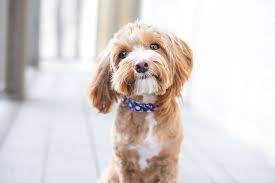
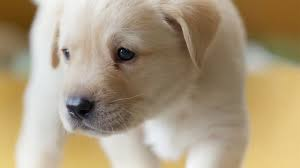
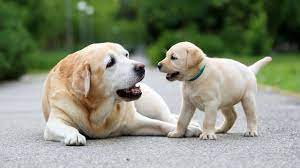
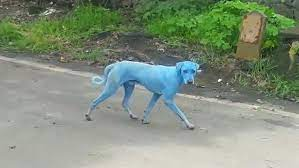
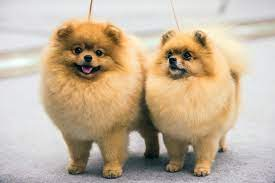
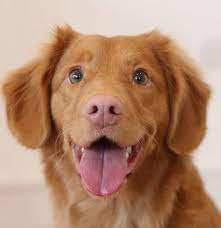
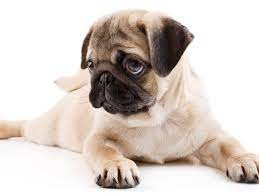
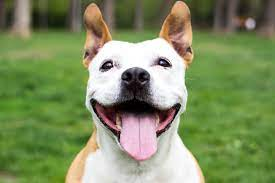
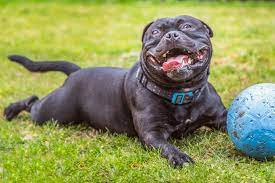
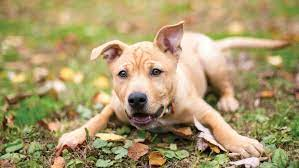
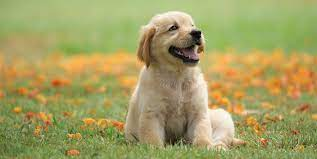
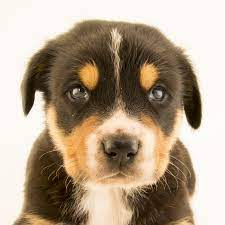
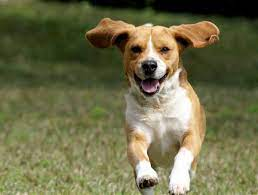
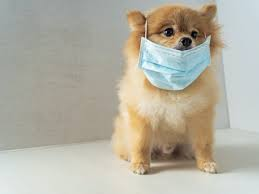
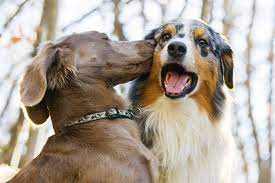
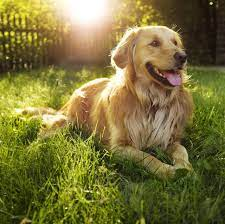
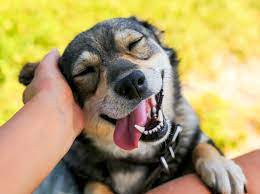
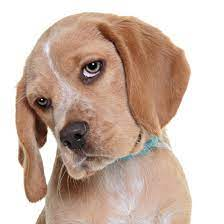
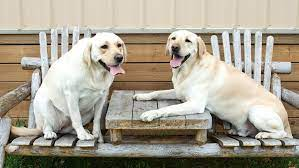
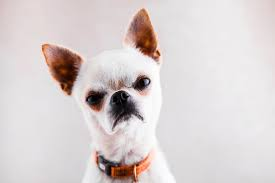

In [186]:
def scrap_images_from_google(path,web_link,key_name):
    driver = webdriver.Chrome(path)
    driver.get(web_link)
    driver.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys(key_name)
    driver.find_element_by_xpath("//div[@class='FAuhyb']").click()
    lis_brand_links=[]
    values={'Images':[]}
    count=0
    time.sleep(8)
    for n,i in enumerate(driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")):
        try:
            if count !=101:
                values['Images'].append(i.get_attribute("src"))
#                 urllib.request.urlretrieve(i.get_attribute("src"), "fruit{}.jpg".format(n)) ## For Download Image
                count+=1
            else:
                break
        except NoSuchElementException as e:
            pass
    return values
    
key_name=input("Enter the Product that you want to search : ")
data=scrap_images_from_google("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver","https://images.google.com/?gws_rd=ssl",key_name)
df=pd.DataFrame(data)    
display(HTML(df.to_html(escape=False ,formatters=dict(Images=path_to_image_html))))

#### Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1 st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [506]:
def scrap_data_from_flipcart(path,web_link,prod_name):
    driver = webdriver.Chrome(path)
    driver.get(web_link)
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
    driver.find_element_by_xpath("//input[@class='_3704LK']").send_keys(prod_name)
    driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()
    lis_brand_links=[]
    values={'Model Name':[],
         'Smartphone name':[],
         'Color':[],
         'RAM':[],
         'Internal Storage':[],
         'Primary Camera':[],
         'Secondary Camera':[],
         'Display Size':[],
         'Resolution':[],
         'Processor Type':[],
         'Processor Core':[],
         'Battery Capacity':[],
         'Price':[],
         'Product URL':[]
           }
    for page in range(1,3):  ## Links for number of pages
        for i in driver.find_elements_by_xpath("//a[@class='_1fQZEK']"):
            lis_brand_links.append(i.get_attribute("href"))
        try:
            if driver.find_element_by_xpath("//div[@class='_2MImiq']/nav/a[11]").text=="NEXT":
                driver.find_element_by_xpath("//div[@class='_2MImiq']/nav/a[11]").click()
                time.sleep(3)
            else:
                driver.find_element_by_xpath("//div[@class='_2MImiq']/nav/a[12]").click()
                time.sleep(3)
        except:
            time.sleep(3)
    for link in lis_brand_links:
        try:
            driver.get(link)
            try: 
                WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CLASS_NAME,'B_NuCI')))
            except NoSuchElementException as e:
                print(e)
                pass
            driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']").click()
            data=driver.find_element_by_xpath("//div[@class='_1UhVsV']").text.split('\n')
            values['Price'].append(driver.find_element_by_xpath("//div[@class='_30jeq3 _16Jk6d']").text)
            values['Product URL'].append(link)
            for i in values.keys():
                if i not in data and i!='Smartphone name' and i!='Price' and i!='Product URL':
                    values[i].append('-')
            for n,val in enumerate(data):
                if val in values.keys():
                    if val=="Color":
                        values[val].append(data[n+1])
                    elif val=='RAM':
                        values[val].append(data[n+1])
                    elif val=='Internal Storage':
                        values[val].append(data[n+1])
                    elif val=='Primary Camera':
                        if data[n-1]!='Dual Camera Lens':
                            values[val].append(data[n+1])
                    elif val=='Secondary Camera':
                        values[val].append(data[n+1])
                    elif val=='Display Size':
                        values[val].append(data[n+1])
                    elif val=='Resolution':
                        values[val].append(data[n+1])
                    elif val=='Processor Type':
                        values[val].append(data[n+1])
                    elif val=='Processor Core':
                        values[val].append(data[n+1])
                    elif val=='Battery Capacity':
                        values[val].append(data[n+1])
                    elif val=='Model Name':
                        values[val].append(data[n+1])
                        values['Smartphone name'].append(data[n+1].split(" ")[0])
                else:
                    continue 
        except TimeoutException as  e:
            print(e)
            time.sleep(2)
    return values
prod_name=input("Enter the Smart Phone Name that you want to search : ")
data=scrap_data_from_flipcart("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver","https://www.flipkart.com/",prod_name)
pd.DataFrame(data)

Enter the Smart Phone Name that you want to search : pixel 4a


,Model Name,Smartphone name,Color,RAM,Internal Storage,Primary Camera,Secondary Camera,Display Size,Resolution,Processor Type,Processor Core,Battery Capacity,Price,Product URL
0,Pixel 4a,Pixel,Just Black,6 GB,128 GB,12.2MP Rear Camera,8MP Front Camera,14.76 cm (5.81 inch),2340 x 1080 Pixels,Qualcomm Snapdragon 730G,Octa Core,3140 mAh,"₹31,999",https://www.flipkart.com/google-pixel-4a-just-...
1,Redmi 9 Prime,Redmi,Matte Black,4 GB,64 GB,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080 Pixels,MediaTek Helio G80,Octa Core,5020 mAh,"₹9,499",https://www.flipkart.com/redmi-9-prime-matte-b...
2,9 Power,9,Blazing Blue,4 GB,64 GB,48MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹10,499",https://www.flipkart.com/redmi-9-power-blazing...
3,9 Power,9,Electric Green,4 GB,64 GB,48MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹10,499",https://www.flipkart.com/redmi-9-power-electri...
4,9 Power,9,Fiery Red,4 GB,64 GB,48MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹10,499",https://www.flipkart.com/redmi-9-power-fiery-r...
5,9 Power,9,Mighty Black,4 GB,64 GB,48MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹10,499",https://www.flipkart.com/redmi-9-power-mighty-...
6,9 Power,9,Mighty Black,6 GB,128 GB,48MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm® Snapdragon™ 662,Octa Core,6000 mAh,"₹12,999",https://www.flipkart.com/redmi-9-power-mighty-...
7,9 Power,9,Fiery Red,4 GB,128 GB,48MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹11,999",https://www.flipkart.com/redmi-9-power-fiery-r...
8,Redmi 9,Redmi,Sky Blue,4 GB,64 GB,13MP + 2MP,5MP Front Camera,16.59 cm (6.53 inch),720 x 1600$$pixel,MediaTek Helio G35,-,5000 mAh,"₹8,998",https://www.flipkart.com/redmi-9-sky-blue-64-g...
9,Redmi 9,Redmi,Carbon Black,4 GB,64 GB,13MP + 2MP,5MP Front Camera,16.59 cm (6.53 inch),720 x 1600$$pixel,MediaTek Helio G35,Octa Core,5000 mAh,"₹9,045",https://www.flipkart.com/redmi-9-carbon-black-...


#### Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [75]:
def scrap_lat_long_from_googlemap(path,web_link,loc_name):
    driver=webdriver.Chrome(path)
    driver.get(web_link)
    driver.find_element_by_xpath("//div[@id='gs_lc50']/input").send_keys(loc_name)
    driver.find_element_by_xpath("//div[@class='searchbox-searchbutton-container']/button").click()
    time.sleep(2)
    lat=driver.current_url.split("@")[1].split("/")[0].split(',')[0]
    long=driver.current_url.split("@")[1].split("/")[0].split(',')[1]
    return f"{loc_name}'s Latitude and Longitude are {lat} {long}"
loc_name=input("Enter the Smart Phone Name that you want to search : ")
data=scrap_lat_long_from_googlemap("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver","https://www.google.com/maps",loc_name)
data

Enter the Smart Phone Name that you want to search : Banglore


"Banglore's Latitude and Longitude are 19.2972558 73.0523224"

#### Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [39]:
from selenium.webdriver.support.select import Select

In [146]:
def scrap_funding_deals_from_trak(path,web_link):
    driver = webdriver.Chrome(path)
    driver.get(web_link)
    driver.get(driver.find_element_by_xpath("//a[@title='https://trak.in/india-startup-funding-investment-2015/']").get_attribute('href'))    
    time.sleep(2)
    values={'Sr. No.':[],
         'Date (dd/mm/yyyy)':[],
         'Startup Name':[],
         'Industry / Vertical':[],
         'Sub-Vertical':[],
         'City / Location':[],
         "Investors' Name":[],
         'Investment Type':[],
         'Amount (In USD)':[],
           }
    for n in driver.find_elements_by_xpath("//div[@class='dataTables_length']/label/select"):
        n.find_element_by_xpath("option[4]").click()
        time.sleep(2)        
    for i in driver.find_elements_by_xpath("//div[@class='dataTables_scrollBody']/table"):
        if (i.text.split('\n')[0].split(' ')[1].split('/')[1] in  ['07','08','09']) and (i.text.split('\n')[0].split(' ')[1].split('/')[2]== '2020'):
            for row in i.find_elements_by_xpath("tbody/tr"):
                values['Sr. No.'].append(row.find_element_by_xpath("td[1]").text)
                values['Date (dd/mm/yyyy)'].append(row.find_element_by_xpath("td[2]").text)
                values['Startup Name'].append(row.find_element_by_xpath("td[3]").text)
                values['Industry / Vertical'].append(row.find_element_by_xpath("td[4]").text)
                values['Sub-Vertical'].append(row.find_element_by_xpath("td[5]").text)
                values['City / Location'].append(row.find_element_by_xpath("td[6]").text)
                values["Investors' Name"].append(row.find_element_by_xpath("td[7]").text)
                values['Investment Type'].append(row.find_element_by_xpath("td[8]").text)
                values['Amount (In USD)'].append(row.find_element_by_xpath("td[9]").text)
    return values
                   
data=scrap_funding_deals_from_trak("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver","https://trak.in/")
pd.DataFrame(data)

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,2,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,3,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,4,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,5,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,6,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,7,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,8,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,9,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,10,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


#### Write a program to scrap all the available details of top 10 gaming laptops from digit.in. 

In [6]:
from selenium.webdriver.common.keys import Keys

In [67]:
driver = webdriver.Chrome("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver")
driver.get('https://www.digit.in/')
driver.find_element_by_xpath("//div[@class='search']").click()
search_box=driver.find_element_by_id('globalPageSearchText')
search_box.send_keys("Gaming Laptops")
search_box.send_keys(Keys.RETURN)

In [70]:
def scrap_laptops_data_from_digit(path,web_link,prod_name):
    driver = webdriver.Chrome(path)
    driver.get(web_link)
    driver.find_element_by_xpath("//div[@class='search']").click()
    search_box=driver.find_element_by_id('globalPageSearchText')
    search_box.send_keys("Gaming Laptops")
    search_box.send_keys(Keys.RETURN)
    links_lis=[]
    values={'Product Name':[],
         'Market Status':[],
         'Release Date':[],
         'Official Website':[],
         'Price':[],
         'Overall Rating':[],
         'Digital Rating':[],
         "Pros":[],
         'Cons':[],
           }
    for n in range(1,5):
        links=[link.find_element_by_xpath("a").get_attribute('href') for link in driver.find_elements_by_xpath("//div[@class='searchPage']") if link.find_element_by_xpath("p").text=='PRODUCTS']
        links_lis.extend(links)
        driver.find_element_by_xpath("//a[@title='Next Page']").click()
    for page in links_lis:
        driver.get(page)
        try: 
            WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CLASS_NAME,'Over-allrating')))
        except NoSuchElementException as e:
            print("Errros is: ",e)
            continue
        values['Product Name'].append(driver.find_element_by_xpath("//div[@class='heading-wraper']/h1").text)
        values['Market Status'].append(driver.find_element_by_xpath("//div[@class='status-bar only-desktop']/div[1]").text.split(" : ")[1])
        values['Release Date'].append(driver.find_element_by_xpath("//div[@class='status-bar only-desktop']/div[2]").text.split(" : ")[1])
        values['Official Website'].append(driver.find_element_by_xpath("//div[@class='status-bar only-desktop']/div[3]").text.split(" : ")[1])
        try:
            values['Price'].append(driver.find_element_by_xpath("//div[@class='Block-price']/b").text)
        except NoSuchElementException as e:
            values['Price'].append('-')
        values['Overall Rating'].append(driver.find_element_by_xpath("//div[@class='Over-allrating']").text.split("\n")[1])
        try:
            digital_rating=driver.find_element_by_xpath("//div[@class='score-Bar']").text.split("\n")[1:3]
            values['Digital Rating'].append(" ".join(digital_rating))
        except NoSuchElementException as e:
            values['Digital Rating'].append("-")
        try:
            pros=driver.find_element_by_xpath("//div[@class='pros-Cons']/ul").text.split("\n+\n")[1:]
            values['Pros'].append(' \n'.join(pros))
        except NoSuchElementException as e:
            values['Pros'].append("-")
        try:
            cons=driver.find_element_by_xpath("//div[@class='pros-Cons']/ul[2]").text.split("\n-\n")[1:]
            values['Cons'].append(' \n'.join(cons))
        except NoSuchElementException as e:
            values['Cons'].append("-")
    return values
prod_name=input("Enter the Smart Phone Name that you want to search : ")
data=scrap_laptops_data_from_digit("/home/pavankumar/Downloads/chromedriver_linux64/chromedriver","https://www.digit.in/",prod_name)
pd.DataFrame(data)
        

Enter the Smart Phone Name that you want to search : Gaming Laptops


,Product Name,Market Status,Release Date,Official Website,Price,Overall Rating,Digital Rating,Pros,Cons
0,Asus G750JX-CV069P,LAUNCHED,14-Oct-2014,Asus,"149,999",4.8/ 5,,-,-
1,ASUS G53J - A 3D Gamer'S Delight But We Want More,LAUNCHED,13-Jan-2011,Asus,"112,499",0/ 5,70 out of 100,Bundles with NVIDIA 3D goggles \nGood build qu...,Expensive \nOrdinary speakers
2,HP Envy 15-K006tx,LAUNCHED,14-Oct-2014,HP,"80,510",3/ 5,,-,-
3,Lenovo IdeaPad Y570,LAUNCHED,07-Feb-2012,Lenovo,"49,900",0/ 5,90 out of 100,High-end performance \nKeyboard and palmrest \...,Thick and heavy
4,ASUS ROG Cetra,LAUNCHED,22-Aug-2020,Asus,"7,699",0/ 5,70 out of 100,Excellent staging for gaming \nDecent ANC perf...,Relatively pricey \nInline controls are slight...
5,HP Pavilion G6 - Multimedia And Gaming On A Bu...,LAUNCHED,04-May-2011,HP,"45,000",0/ 5,70 out of 100,Strong overall performance \nwell built,Not for power gamers \nlow battery life
6,Truvison TX3271,LAUNCHED,26-Oct-2017,Truvison,"23,490",0/ 5,,-,-
7,Lenovo G50-30,LAUNCHED,17-Mar-2016,Lenovo,"25,694",4.7/ 5,,-,-
8,ASUS EeePC,LAUNCHED,01-Mar-2008,Asus,"18,000",0/ 5,80 out of 100,-,-
9,HP Elitebook Folio,LAUNCHED,14-Jul-2016,HP,"160,737",0/ 5,74 out of 100,Very thin and very light \nDependable performa...,Battery life is average \nReflective screen \n...
